In [1]:
import numpy as np
import pandas as pd
from scipy import signal, ndimage, interpolate, stats, spatial
import sys, os, time, json
from pathlib import Path
import pickle as pkl

sys.path.append('../PreProcessing/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.text import Text

import TreeMazeFunctions as TMF
import spike_functions as SF
import spatial_tuning as ST
from importlib import reload  # Python 3.4+ only.


In [2]:
oakPaths = {}
oakPaths['Root'] = Path('/mnt/o/giocomo/alexg/')
oakPaths['Clustered'] = Path('/mnt/o/giocomo/alexg/Clustered/')
oakPaths['PreProcessed'] = Path('/mnt/o/giocomo/alexg/PreProcessed/')
oakPaths['Raw'] = Path('/mnt/o/giocomo/alexg/RawData/InVivo/')
oakPaths['Analyses'] = Path('/mnt/o/giocomo/alexg/Analyses')

In [3]:
animals = ['Li','Cl']

an = 'Li'

In [4]:
fn = oakPaths['Root'] / (an+'_AnalysesTable.csv')
aTable = pd.read_csv(fn,index_col=0)

fn = oakPaths['Root'] / (an+'_SessionPaths.pkl')

with fn.open(mode="rb") as f:
    sePaths = pkl.load(f)

In [5]:
SF = reload(SF)

se = 'Li_T3g_060418'
with sePaths[se]['ClusterTable'].open() as f:
    CT = json.load(f)

date = sePaths[se]['date']
task = sePaths[se]['task']
sessionCellIDs = CT[an][date][task]['cell_IDs']
sessionMuaIDs = CT[an][date][task]['mua_IDs']
sessionPaths = sePaths[se]

cell_spikes_thr,wf,wfi = SF.get_TT_spikes(sessionCellIDs,sessionPaths)
cell_spikes, mua_spikes = SF.getSessionSpikes(sessionPaths,overwrite=1,rej_thr=None)

KeyboardInterrupt: 

In [78]:
se = 'Li_T3g_062718'
with sePaths[se]['ClusterTable'].open() as f:
    CT = json.load(f)

date = sePaths[se]['date']
task = sePaths[se]['task']
sessionCellIDs = CT[an][date][task]['cell_IDs']
sessionMuaIDs = CT[an][date][task]['mua_IDs']
sessionPaths = sePaths[se]
SF = reload(SF)
cell_spikes_thr,wf,wfi = SF.get_TT_spikes(sessionCellIDs,sessionPaths,rej_thr=0.75)

In [7]:
unit=3
waveforms = wf[unit]
nF = 64*4
nSp = waveforms.shape[0]
X = np.reshape(waveforms,(nSp,nF))

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
lls = pca.score_samples(X)

In [68]:
from robust_stats import *
zz = robust_zscore(lls)

In [79]:
wfi

{0: {'mean': array([[ 7.31662953e+02,  7.22983287e+02,  1.10692758e+03,
           6.53415042e+02],
         [ 9.60743733e+02,  8.69743733e+02,  1.40311978e+03,
           6.40350975e+02],
         [ 1.04654875e+03,  9.19264624e+02,  1.54794708e+03,
           5.50192201e+02],
         [ 9.70214485e+02,  8.77763231e+02,  1.55261838e+03,
           4.19874652e+02],
         [ 7.73807799e+02,  7.63490251e+02,  1.45559331e+03,
           3.04320334e+02],
         [ 5.35484680e+02,  5.95729805e+02,  1.30522284e+03,
           2.38604457e+02],
         [ 3.24384401e+02,  4.00944290e+02,  1.14708914e+03,
           2.14571031e+02],
         [ 1.58261838e+02,  2.06376045e+02,  9.94083565e+02,
           1.88175487e+02],
         [-5.12534819e+00,  1.80835655e+01,  7.94529248e+02,
           1.10654596e+02],
         [-2.29000000e+02, -1.86295265e+02,  4.52838440e+02,
          -3.52618384e+01],
         [-5.35320334e+02, -4.27760446e+02, -8.11281337e+01,
          -2.13590529e+02],
         [

In [76]:
np.mean(Y[zz>1]),np.mean(Y[zz<-2])

(0.3461875044014872, 0.4733432448430957)

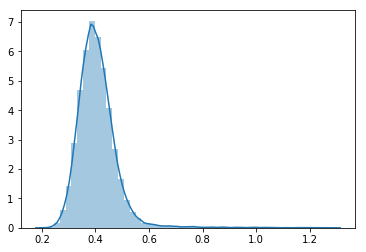

In [84]:
sns.distplot(Y)

In [83]:
wfi[unit]['cv']

1.0738652892382479

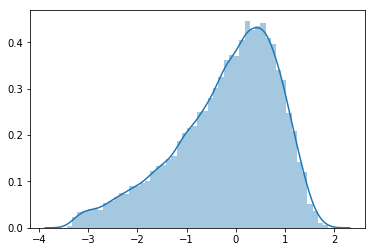

In [186]:
sns.distplot(zz)

In [85]:
plt.plot(np.mean(wf[unit][Y>1,:],0))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3511 but corresponding boolean dimension is 26045

In [86]:
plt.plot(np.mean(wf[unit][Y<1,:],0))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3511 but corresponding boolean dimension is 26045

In [49]:
spatial.distance.cosine([0,0,0,1],[0,0,0,0.2])

0.0

In [16]:
PosDat = TMF.getBehTrackData(sessionPaths)

Loading Beh Tracking Data
Complete.


In [9]:
SF = reload(SF)
cell_bin_spikes, mua_bin_spikes, ids = SF.getSessionBinSpikes(sessionPaths,overwrite=1,cell_spikes=cell_spikes,mua_spikes=mua_spikes)
cell_FR, mua_FR = SF.getSessionFR(sessionPaths,overwrite=1,cell_bin_spikes=cell_bin_spikes,mua_bin_spikes=mua_bin_spikes)

Binned Spikes Files not Found or overwrite=1, creating them.
Missing resampled time input (resamp_t).
Loading Beh Tracking Data
Complete.
Bin Spike File Creation and Saving Completed.
Firing Rate Files Not Found or overwrite=1, creating them.
Spike File Creation and Saving Completed.


In [22]:
t=PosDat['t']
SR = sessionPaths['SR']
orig_time = np.arange(t[0],t[-1],1/SR)

In [52]:
#len(cell_spikes['3']['1']),len(cell_spikes_thr['3']['1'])
sp = np.array(cell_spikes['3']['1'])
nT = len(t)
step = sessionPaths['step']

In [39]:

sp_bins,bins = np.histogram(orig_time[sp],nT)
sp_bins,bins

(array([1, 1, 2, ..., 0, 0, 1]),
 array([ 876.56525   ,  876.58512762,  876.60500524, ..., 3496.11765154,
        3496.13752916, 3496.15740678]))

In [54]:
sp_bins,bins = np.histogram(orig_time[sp],np.concatenate([t,[t[-1]+step]]))
len(sp_bins),len(bins),len(t)

(131786, 131787, 131786)

In [53]:
len(np.concatenate([t,[t[-1]+step]]))

131787

In [48]:
?np.concatenate

Docstring:
concatenate((a1, a2, ...), axis=0, out=None)

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.

Returns
-------
res : ndarray
    The concatenated array.

See Also
--------
ma.concatenate : Concatenate function that preserves input masks.
array_split : Split an array into multiple sub-arrays of equal or
              near-equal size.
split : Split array into a list of multiple sub-arrays of equal size.
hsplit : Split array into multiple sub-arrays horizontally 